<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Hou-et-al-2011-Model" data-toc-modified-id="Hou-et-al-2011-Model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Hou et al 2011 Model</a></span><ul class="toc-item"><li><span><a href="#Rearranging-in--terms-of-$\frac{dm}{dt}$" data-toc-modified-id="Rearranging-in--terms-of-$\frac{dm}{dt}$-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Rearranging in  terms of $\frac{dm}{dt}$</a></span></li><li><span><a href="#Direct-Calculation-of-dm/dt" data-toc-modified-id="Direct-Calculation-of-dm/dt-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Direct Calculation of dm/dt</a></span></li><li><span><a href="#checking-B0" data-toc-modified-id="checking-B0-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>checking B0</a></span></li></ul></li><li><span><a href="#Bottom-Up-Supply-Model" data-toc-modified-id="Bottom-Up-Supply-Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Bottom Up Supply Model</a></span><ul class="toc-item"><li><span><a href="#Simplified-Model" data-toc-modified-id="Simplified-Model-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Simplified Model</a></span></li><li><span><a href="#Functional-Response" data-toc-modified-id="Functional-Response-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Functional Response</a></span><ul class="toc-item"><li><span><a href="#Mass-Specific-Functional-Response" data-toc-modified-id="Mass-Specific-Functional-Response-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Mass Specific Functional Response</a></span></li></ul></li><li><span><a href="#Gain" data-toc-modified-id="Gain-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Gain</a></span></li><li><span><a href="#Loss" data-toc-modified-id="Loss-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Loss</a></span></li><li><span><a href="#Testing" data-toc-modified-id="Testing-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Testing</a></span><ul class="toc-item"><li><span><a href="#No-fluctuation-in-R(t)" data-toc-modified-id="No-fluctuation-in-R(t)-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>No fluctuation in R(t)</a></span></li><li><span><a href="#Adding-Fluctuation-for-R(t)" data-toc-modified-id="Adding-Fluctuation-for-R(t)-2.5.2"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span>Adding Fluctuation for R(t)</a></span><ul class="toc-item"><li><span><a href="#Different-periods-and-amplitudes" data-toc-modified-id="Different-periods-and-amplitudes-2.5.2.1"><span class="toc-item-num">2.5.2.1&nbsp;&nbsp;</span>Different periods and amplitudes</a></span></li><li><span><a href="#Constant-Period" data-toc-modified-id="Constant-Period-2.5.2.2"><span class="toc-item-num">2.5.2.2&nbsp;&nbsp;</span>Constant Period</a></span></li></ul></li><li><span><a href="#Considerations-about-fluctuation" data-toc-modified-id="Considerations-about-fluctuation-2.5.3"><span class="toc-item-num">2.5.3&nbsp;&nbsp;</span>Considerations about fluctuation</a></span></li></ul></li></ul></li><li><span><a href="#To-do-List" data-toc-modified-id="To-do-List-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>To do List</a></span></li><li><span><a href="#Sandbox" data-toc-modified-id="Sandbox-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Sandbox</a></span><ul class="toc-item"><li><span><a href="#sin-wave" data-toc-modified-id="sin-wave-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>sin wave</a></span></li><li><span><a href="#Heatmap" data-toc-modified-id="Heatmap-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Heatmap</a></span></li><li><span><a href="#multiplot" data-toc-modified-id="multiplot-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>multiplot</a></span></li></ul></li></ul></div>

This notebook is to build the models for Hou et al 2011 and model based on discussions with supervisors which is based on a more bottom up aproach compared to traditional OGMs. 

In [1]:
## imports
import Functions as F
import scipy as sc
import numpy as np

# Hou et al 2011 Model
 The Hou et al 2011 model needs to be rearranged so as it can be used for my purposes.  I need to express the model in terms of $\frac{dm}{dt}$.
## Rearranging in  terms of $\frac{dm}{dt}$
Hou et al. state that:
\begin{align}
    E_m \frac{dm}{dt} = B_0 m^\frac{3}{4} - B_m m 
\end{align}
where:
- $E_m$ : the amount of metabolic energy required to synthesize one unit of biomass
- $B_0$ : Taxon specific constant = $b_0 e^{-\frac{E_0}{KT}}$ (Boltzmann-Arrhenius equation)
- $B_m$ : mass specific metabolic rate = $B_0 M^{-\frac{1}{4}}$


When trying to calculate feeding restricted growth (FR) for a proportion of *ad libitum* growth $\beta$:
\begin{align}
    \beta [(f + \frac{E_c}{E_m}) B_0 m(t)^{\frac{3}{4}} - \frac{E_c}{E_m} B_0 M^{- \frac{1}{4}} m(t)] = f B_{0, FR}m_{FR}(t)^\frac{3}{4} + E_c \frac{dm_{FR}(t)}{dt} \\
    \beta [(f + \frac{E_c}{E_m}) B_0 m(t)^{\frac{3}{4}} - \frac{E_c}{E_m} B_0 M^{- \frac{1}{4}} m(t)] - f B_{0, FR}m_{FR}(t)^\frac{3}{4} &=  E_c \frac{dm_{FR}(t)}{dt}\\
        \frac{\beta [(f + \frac{E_c}{E_m}) B_0 m(t)^{\frac{3}{4}} - \frac{E_c}{E_m} B_0 M^{- \frac{1}{4}} m(t)] - f B_{0, FR}m_{FR}(t)^\frac{3}{4}}{E_c} &=  \frac{dm_{FR}(t)}{dt}\\
\end{align}

Where:
- $E_c$ : the combustion energy of a cell

To calculate $m(t)$ to insert into the above equation:
\begin{align}
   m(t) &= (1 - [1 - (\frac{m_0}{M})^\frac{1}{4}] e^{-\frac{B_{0t}}{4 E_m M^\frac{1}{4}}})^4 M\\
\end{align}

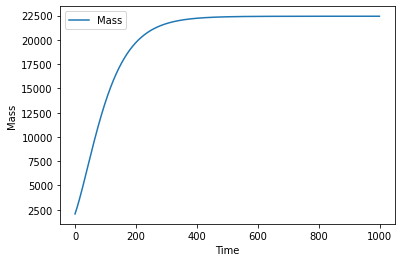

[ 2063.          2157.75071903  2254.19716564  2352.29237633
  2451.98900645  2553.23935969  2655.99549673  2760.20929137
  2865.83250296  2972.81684694  3081.11403166  3190.67583338
  3301.45419776  3413.40122952  3526.46924357  3640.61083905
  3755.77892842  3871.92678232  3989.00806391  4106.97686724
  4225.78774454  4345.39573824  4465.7564076   4586.82587091
  4708.56082001  4830.91851904  4953.85684201  5077.33427944
  5201.30999163  5325.74379442  5450.5961623   5575.82825781
  5701.40194797  5827.2797937   5953.42506486  6079.801753
  6206.37456836  6333.10894466  6459.97104765  6586.92777372
  6713.94674859  6840.99633065  6968.04561268  7095.06441481
  7222.02328466  7348.89349995  7475.64705737  7602.25666926
  7728.69575863  7854.93845793  7980.95960877  8106.73474595
  8232.24009598  8357.45257158  8482.34975493  8606.90989468
  8731.11190493  8854.93535448  8978.36045858  9101.36805886
  9223.93962619  9346.05725139  9467.70363475  9588.86207585
  9709.51646073  9829.6512

In [2]:
# a section to test functions and other functionality
#dog
m0 = 2063
time = 10**3
params = {"beta":0.75, "f":1.8, "Ec":24000, "Em":4185, "B0":3920, "B0FR":3920 * 1.04,  "M":34805}
mass = F.hou_integrate(m0=m0, time=time, params=params)[:,0] # using mice from hou et al 2011
# may want to define B0 and B0FR based on b0 and calculate in function?
F.plot_hou(m0, time, params)
print(mass)

## Direct Calculation of dm/dt
- Since the growth above is too slow I check whether it could an issue with the way feeding restricted is calculated from *ad libitum*

\begin{align}
    


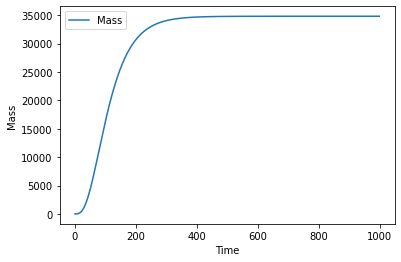

[1.00000000e-01 3.79648688e-01 1.01523506e+00 2.20734382e+00
 4.18574700e+00 7.20247663e+00 1.15257213e+01 1.74344692e+01
 2.52138278e+01 3.51509545e+01 4.75315391e+01 6.26367846e+01
 8.07408351e+01 1.02108607e+02 1.26993980e+02 1.55638311e+02
 1.88269240e+02 2.25099748e+02 2.66327443e+02 3.12134052e+02
 3.62685089e+02 4.18129680e+02 4.78600523e+02 5.44213970e+02
 6.15070212e+02 6.91253552e+02 7.72832752e+02 8.59861449e+02
 9.52378618e+02 1.05040909e+03 1.15396407e+03 1.26304178e+03
 1.37762795e+03 1.49769652e+03 1.62321022e+03 1.75412120e+03
 1.89037163e+03 2.03189439e+03 2.17861362e+03 2.33044536e+03
 2.48729814e+03 2.64907358e+03 2.81566694e+03 2.98696768e+03
 3.16286003e+03 3.34322346e+03 3.52793321e+03 3.71686078e+03
 3.90987437e+03 4.10683934e+03 4.30761861e+03 4.51207312e+03
 4.72006214e+03 4.93144368e+03 5.14607483e+03 5.36381207e+03
 5.58451159e+03 5.80802958e+03 6.03422250e+03 6.26294730e+03
 6.49406170e+03 6.72742443e+03 6.96289536e+03 7.20033575e+03
 7.43960837e+03 7.680577

In [3]:
## Looking at just reproducing growth using Hou et al 2011
m0 = 0.1
time = 10**3
params = {"B0" : 3920, "Em" : 4185, "M" : 34805}

print(F.plot_hou_simple(m0, time, params))



## checking B0
In the above calculations I have taken B0 to be 3.9$W/Kg$, which is the average for mammals (Hou et al 2008)

Below will look at calculating exact values following the equations laid out in Hou et al 2011 (basically Boltzmann-Arrhenius equations).

\begin{align}
    B_0 = b_0 e ^{\frac{E_0}{KT}}
\end{align}
Where:
- $b_0$ : taxon specific constant
- $E_0 \approx 0.65 eV$ : average activation energy
- $T$ : temperature in Kelvin
- $K = 8.62 \times 10^{-5}$: Bolzmann's constant

# Bottom Up Supply Model
A bottom up supply model that uses a functional response scaled by an allocation constraint to define the gain term.

## Simplified Model
\begin{align}
    \frac{1}{m} \frac{dm}{dt} &= Gain - Loss \\
    \frac{1}{m} \frac{dm}{dt} &= \epsilon f(\cdot) - (L_B + L_R) \\
\end{align}
where:
- $\epsilon$ : allocation constraint (efficiency of conversion from food to energy), dimensionless
- $mf\cdot$ : consumption (intake) rate, mass\time
- $L_B$ : Maintenance cost ($\propto$ Resting metabolic rate),  \rate (mass specific)
- $L_R$ : reproductive cost, rate (mass specific)

## Functional Response
\begin{align}
    f(\cdot) &= \frac{a R(t)}{1 + ahR(t)} \\
\end{align}
where:
- $a$ : Search rate, area or volume/time
- $R(t)$ :  Resource Density at time t, mass/area (time dependent)
- $h$ : Handling time

\begin{align}
    f(\cdot)_{lim_{R \to \infty}} &= \frac{1}{h} \\
     \text{at } \textit{ad libitum} \text{ resource availibility} & \text{ consumption is limited by handling time}\\
\end{align}

### Mass Specific Functional Response
In order for the responses to scale with mass, mass specific parameters are needed in search rate.  

\begin{align}
    f(\cdot) &= \frac{a(m) R(t)}{1 + a(m)h(m)R(t)} \\
\end{align}

Where:
\begin{align}
    a(m) &= a_0 m^{\gamma} \\
    h(m) &= t_{k,0} m^{-\beta}\\
\end{align}
- $a_0$ is the mass specific search rate and changes depending on dimensionality (see pawar et al 2012). ($a_0 = 10^{-3.08}$ and $\gamma = 1.05$ in 2D and $= 10^{-1.77}$ and $\gamma = 0.68$in 3D)
    - __*the exponent should also change here (should discuss)*__
- $t_{k,0}$ is the mass specific handling time and changes depending on dimensionality (see pawar et al 2012). ($t_{k,0} = 10^{3.95}$ and $\beta = 1.1$ in 2D and $= 10^{3.04}$ and $\beta = 1.02$in 3D)

Search Rate Source (Pawar et al 2012 Main text):
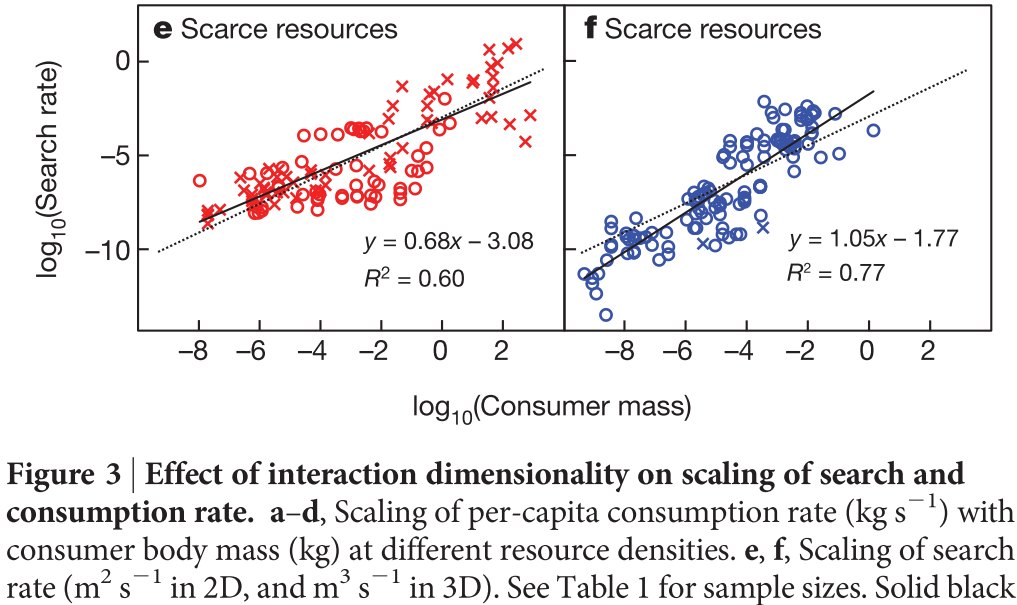

Handling Time Source (Pawar et al 2012 SI):
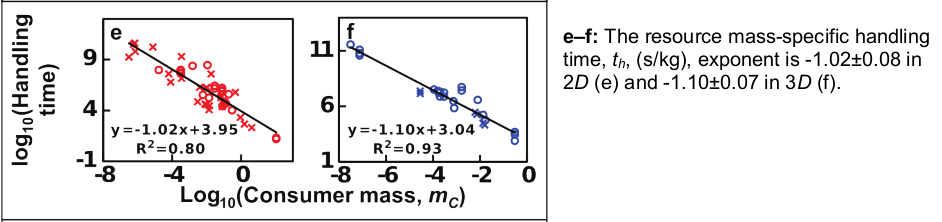
## Gain
Gain should scale with $m^\frac{3}{4}$
- to accomplish this it needs to be multiplied by $m^{-\frac{1}{4}}$ to accomadate for when m is multiplied through for all LHS terms in dmdt.

## Loss 
\begin{align}
    B_m &= N_c(t)B_c \\
    B_m &\propto \frac{m(t)}{m_c} M^{-\frac{1}{4}}\\
    \text{If:   } m(t) = M , \\
    B_m &\propto \frac{MM^{-\frac{1}{4}}}{m_c} \propto \frac{M^\frac{3}{4}}{m_c}\\
    m(t) << M,\\
    B_m &\propto \frac{mM^{-\frac{1}{4}}}{m_c}\\
\end{align}


## Testing
### No fluctuation in R(t)

/home/donal/Documents/Project/code/Functions.py:336: RuntimeWarning: invalid value encountered in log10
  logged = (exp*log10(m)) + a0
/home/donal/Documents/Project/code/Functions.py:362: RuntimeWarning: invalid value encountered in log10
  logged = (exp*log10(m)) + tk0


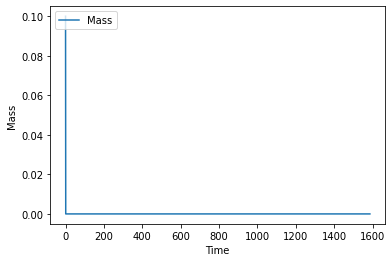

[1.00000000e-01 3.67132730e-08 1.84778012e-08 ...            nan
            nan            nan]


In [4]:
#params from pawar et al 2012 SI : Salmo trutta [juvenile] → Gammarus sp. [dead adult] 
# params = {"epsilon" : 1, "L_B" : 0, "L_R" : 0, "a" : 2.25*10**-2, "R" : 3.81*10**-5, "h" : 1.22*10**2} # L_B as B0 from hou

# params = {"epsilon" : 1, "L_B" : 10**-4.7, "L_R" : 0,
#           "R" : 1.2*10**-3, "h" : 2.57, "amp" : 0, "period" : 1}

params = {"alpha" : 200, "epsilon" : 1, "M" : 20000, "mc" : 3 * 10**-9, "L_R" : 0,
          "R" : 10**6, "amp" : 0, "period" : 1, "dimensionality" : "2D"}
m0 = 0.1
time = 10**5

mass = F.plot_supply(m0, time, params)

a= 200000 + 100000
b = 200000 + 100000
print(mass)

In [5]:
365*100
a
10**5 / 365
m = 20000
print(F.hm(m, "3D"))
print(F.am(m, "3D"))
# print(F.Fun_Resp())
print(F.Bm(m, params["M"],params["mc"]))


14988994.379363542
28.560939991649118
560597610169.143


/home/donal/Documents/Project/code/Functions.py:336: RuntimeWarning: invalid value encountered in log10
  logged = (exp*log10(m)) + a0
/home/donal/Documents/Project/code/Functions.py:362: RuntimeWarning: invalid value encountered in log10
  logged = (exp*log10(m)) + tk0


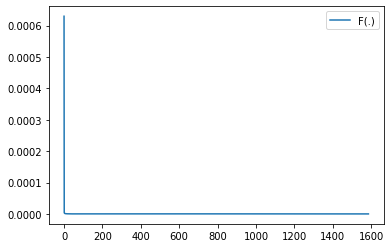

In [6]:
## checking F(.)
import matplotlib.pyplot as plt
# params = {"alpha" : 200, "epsilon" : 1, "L_B" : 10**-5.3, "L_R" : 10**-5.5,
#           "R" : 10, "amp" : 0, "period" : 1, "dimensionality" : "2D"}
# m0 = 0.1
# time = 10**3

mass = F.dmdt_integrate(m0, time, params)# growth curve 
                        
# check the functional response over growth
FR = []
for t, m in enumerate(mass):
    FR.append(F.Fun_Resp(m, R = F.Rt(t, amp=0, period=365, centre=100)))
    
# FR = FR*mass
plt.figure()
plt.plot(np.arange(0, time, 1), FR, label="F(.)")
plt.legend()
plt.show()
# print(FR)

playing with the fluctuation of R seems to only affect the growth phase

the affect also seems to be fairly minimal for even as much a 50% fluctuation

### Adding Fluctuation for R(t)
#### Different periods and amplitudes

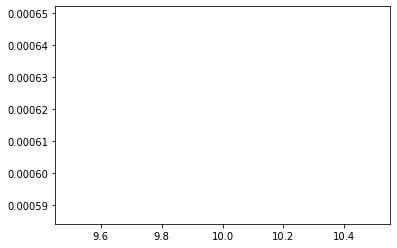

In [7]:
## looking at how the response varies for fixed size and amplitude
masses = [0.1, 1, 10, 100, 1000]# masses in g
time = np.arange(0, 10**3,1)
centre = 10 #  value to fluctuate around
amps = np.linspace(0, centre, len(masses))
# plt.figure()

# for i, m in enumerate(masses,1):
#     FR = []
#     for j, amp in enumerate(amps):
#         for t in time:
#             FR.append(F.Fun_Resp(m, F.Rt(t, amp, centre, period = 365)))
#         plt.subplot(5,5, i+j)
#         plt.plot(t, FR)
FR = []
Rt = []
for t in time:
    Rt.append(F.Rt(t, amps[0],centre, period = 365))
    FR.append(F.Fun_Resp(masses[0], Rt[t]))
    
plt.plot(Rt,FR)

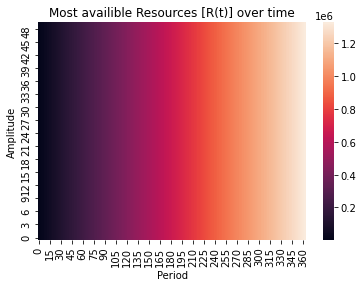

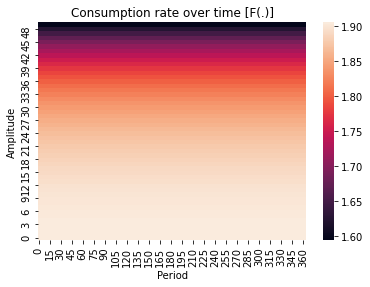

In [8]:
# heatmap of how 
import Functions as F
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.integrate import odeint as odeint
resource = 1
days = 365
period = np.arange(1, days, 1)
amp = np.linspace(0, resource, 50) # use linspace here since i dont know what the resource value looks like yet
time = np.arange(0, days*10, 1)
period, amp = np.meshgrid(period, amp)

## Resource density
R_t = np.zeros_like(amp)

for t in time:
    R_t = R_t + F.Rt(t, amp, period, resource)
    
# # plt.xlabel("")
# # sb.heatmap(fun(x,y), xticklabels = 10, yticklabels= 10).invert_yaxis()
sb.heatmap(R_t).invert_yaxis()
plt.title("Most availible Resources [R(t)] over time")
plt.xlabel("Period")
plt.ylabel("Amplitude")
plt.show()

## functional response
FuncResp = np.zeros_like(amp)

for t in time:
    FuncResp = F.Fun_Resp(m = 0.1,  R = F.Rt(t, amp, centre = resource)) + FuncResp
    
sb.heatmap(FuncResp).invert_yaxis()
plt.title("Consumption rate over time [F(.)]")
plt.xlabel("Period")
plt.ylabel("Amplitude")
plt.show()

## properly using integration 
# def FuncInt(m, t, amp, period, centre, h):
#     return F.Fun_Resp(m, F.Rt(t, amp, period, centre = resource), h)
# t = np.arange(0, 365*2, 1)
# m = 0.1
# h = 2.57
# centre = resource

# FuncRespInt = odeint(FuncInt, m, t, args=(amp, period, centre, h))


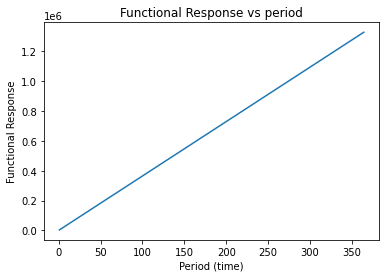

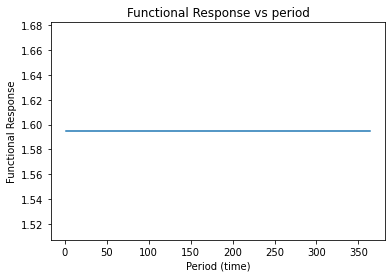

In [9]:
# looking at the resource fluctuation with period
plt.figure()
plt.plot(period[0,:], R_t[-1,:], label = "F(.)")
plt.title("Functional Response vs period")
plt.xlabel("Period (time)")
plt.ylabel("Functional Response")
plt.show()
# looking at the fucntional response fluctuation with period
plt.figure()
plt.plot(period[0,:], FuncResp[-1,:], label = "F(.)")
plt.title("Functional Response vs period")
plt.xlabel("Period (time)")
plt.ylabel("Functional Response")
plt.show()

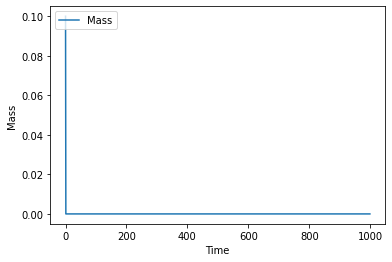

In [10]:
# params = {"epsilon" : 1, "L_B" : 10**-4.7, "L_R" : 0,  
#           "R" : 1.2*10**-3, "amp" : 0.01, "period" : 365}
time = 10**3

mass = F.plot_supply(m0, time, params)

# print(mass)

#### Constant Period

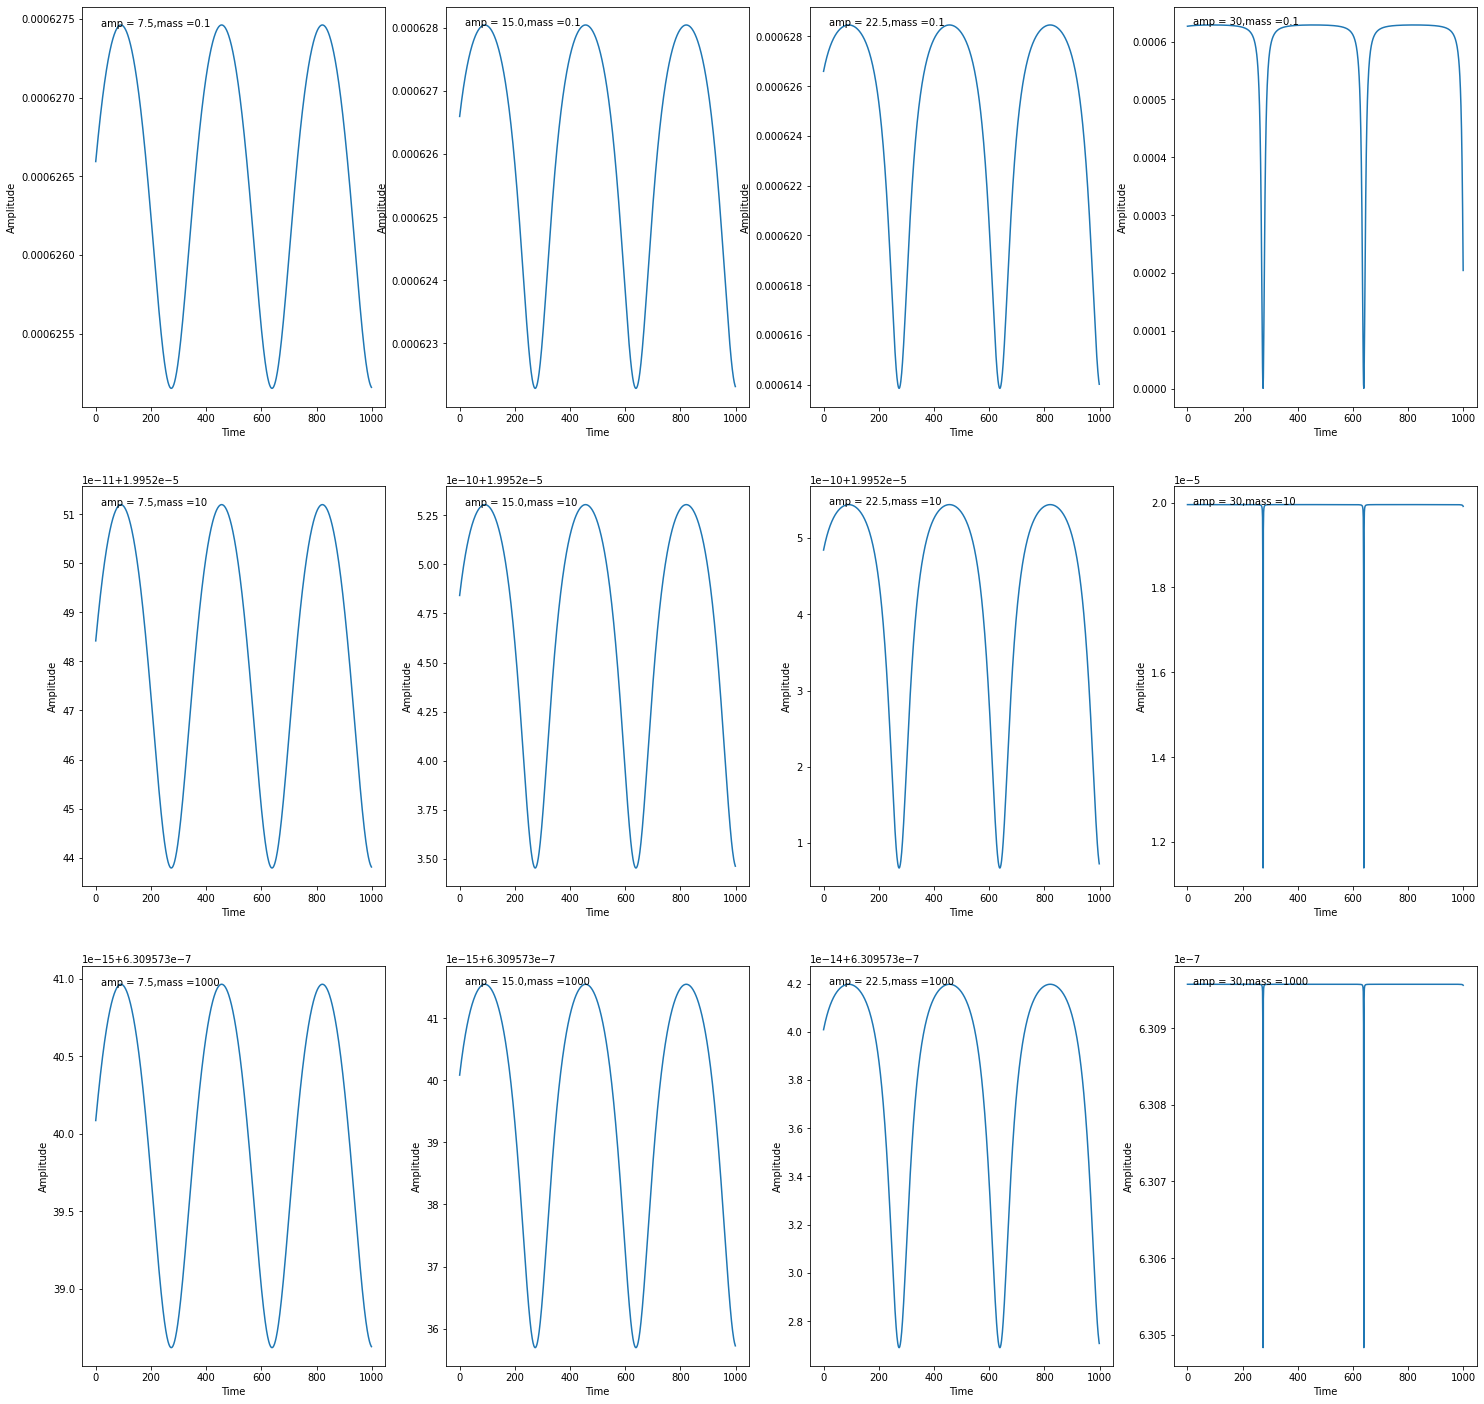

In [24]:
time = np.arange(0, 10**3, 1)
resource = 10*3
period = 365
masses = [0.1, 10, 1000]
amps = [i*resource for i in [0.25, 0.5, 0.75, 1]]

plt.figure(figsize=(25,25))
ticker = 0
for m in masses:
    for amp in amps:
        ticker = ticker +1
        FR = [0] * len(time)
        
        for t in time:
            R_t = F.Rt(t, amp, resource, period)
            FR[t] = F.Fun_Resp(m, R_t, "3D") 

        plt.subplot(3,4, ticker)
#         plt.title(str(amp) +","+ str(FR))
        plt.plot(time, FR, label = str(amp) +","+ str(m))
        plt.text(20, FR[100],"amp = " + str(amp) +","+ "mass =" + str(m))
        plt.xlabel("Time")
        plt.ylabel("Amplitude")

plt.show()

            

### Considerations about fluctuation
Fluctuation appears to mainly affect the start of the growth curve and not so much once stability is reached.
So this raises the questions:
- where on the sin wave does the organism start
- 

# To do List

- different masses and amplitudes plot 


# Sandbox 

## sin wave

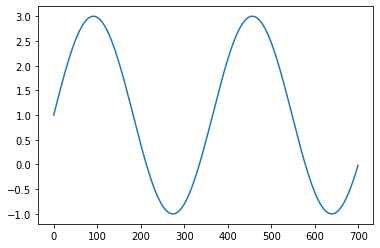

In [12]:
# testing a sin wave function
import Functions as F
import scipy as sc
import matplotlib.pyplot as plt
def Rt(t, amp, period, centre):
    """
    period is the period of the wave in days
    centre is the value the wave will oscilate around
    amp is amplitude
    t is the number of days, should essentailly reset to 1 when it is 1 day over the period
    """
    x = t * (2 * np.pi / period) 
    return amp * np.sin(x) + centre


t = np.arange(0, 700, 1)
Rts = []
for i in t:
    Rts.append(F.Rt(t=i, amp=2, period=365, centre=1))
    
plt.figure()
plt.plot(t, Rts)
plt.show()

## Heatmap

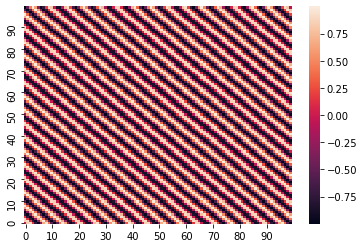

In [13]:
# heatmap testing

import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sb
res = 100
x = np.arange(0, res, 1)
y = np.arange(0, res, 1)

x,y = np.meshgrid(x,y)

def fun(x,y):
    return np.sin(x + y)

plt.xlabel("x")
sb.heatmap(fun(x,y), xticklabels = 10, yticklabels= 10).invert_yaxis()

## multiplot

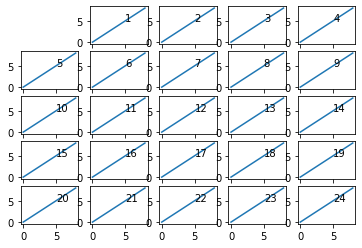

In [14]:
import matplotlib.pyplot as plt

t = np.arange(0,9,1)
m = np.arange(0, 9,1)

for i in range(1,25):
    plt.subplot(5,5,i+1)
    plt.plot(t,m)
    plt.text(5, 5, i)

In [15]:
plt.text

<function matplotlib.pyplot.text(x, y, s, fontdict=None, withdash=<deprecated parameter>, **kwargs)>

In [16]:
import numpy as np
m = 0.25
beta = 1.1
a0 = 3

print(10**np.log10(a0*(m**beta)))
a0 = 10**a0
print(a0 * (m**beta))


0.652912922472093
217.637640824031
